# H2O automl

In [2]:
# Импортируем необходимые библиотеки 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import h2o
from h2o.automl import H2OAutoML

import warnings
warnings.filterwarnings('ignore')                   # Игнорировать предупреждения
pd.set_option('display.max_rows',100)               # Показывать больше строк
pd.set_option('display.max_columns',100)            # Показывать больше колонок
pd.set_option('display.max_colwidth', 60)           # Показывать полный текст в ячейке
pd.options.display.float_format ='{:,.3f}'.format   # Показывать три знака после точки-разделителя
plt.rcParams['figure.figsize'] = (5, 3)             # Формат графиков по умолчанию

# !pip install h2o

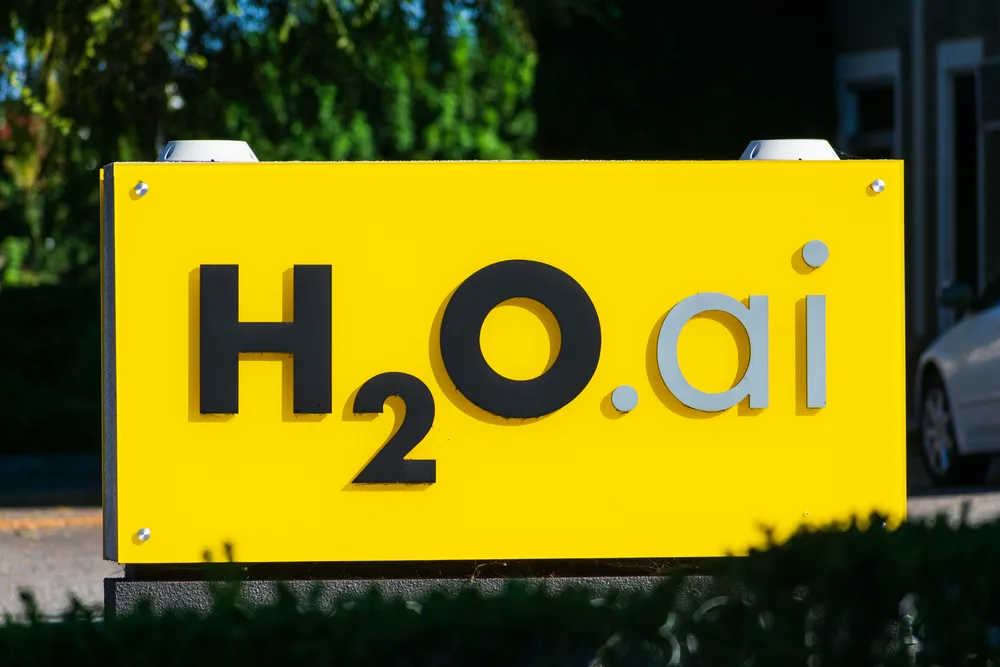

#### Полезные материалы:    
- <a href="https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html">H2O AutoML: Automatic Machine Learning</a>
- <a href="https://docs.h2o.ai/">Документация H2O.ai</a>

In [17]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp3yssur01
  JVM stdout: /tmp/tmp3yssur01/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp3yssur01/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_jkx6en
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [18]:
print(h2o.__version__)
# ?H2OAutoML

3.44.0.1


In [20]:
# Загрузим данные
X_train_h2o = h2o.import_file('/content/X_train_automobiles_h2o.csv')
X_test_h2o = h2o.import_file('/content/X_test_automobiles_h2o.csv')

print('X_train_h2o', type(X_train_h2o), X_train_h2o.shape)  # (86854, 34)
display(X_train_h2o.head(3))
print('X_test_h2o', type(X_test_h2o), X_test_h2o.shape)  # (34686, 33)
display(X_test_h2o.head(3))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
X_train_h2o <class 'h2o.frame.H2OFrame'> (86854, 34)


bodyType,brand,color,fuelType,numberOfDoors,productionDate,vehicleTransmission,engineDisplacement,enginePower,mileage,drive_gear,wheel,owners,vehicle_passport,model_name,complectation_true,region_or_country,bodyType_rough,mileage_by_owner,mileage_per_year,dealer,compound_sentiment_score,positive_score,negative_score,neutral_score,description_cluster,description_len,description_len_log,tf_idf_scores,tf_idf_scores_log,description_rough_NaN,price_cut,production_market_diff,price
14,0,15,0,3,2.73961,2,0.916896,-0.0213487,2.00645,2,0,1.04438,1,1,0.634181,1,12,0.873459,-0.0175697,-0.515243,-0.22957,-0.207664,-0.10222,0.139171,0,-0.448498,-0.292016,-0.592212,-0.468815,-0.164783,-2.28747,-0.70462,12.2061
14,0,7,0,3,3.45039,2,-0.272989,-1.00298,0.284066,1,0,1.04438,1,1,0.634181,1,12,-0.217856,-1.00053,-0.515243,-0.22957,-0.207664,-0.10222,0.139171,0,-0.530252,-0.716573,-0.936512,-1.00442,-0.164783,-2.28747,0.968732,11.0021
18,0,13,0,4,3.02392,2,0.321953,-0.46542,0.835929,2,0,1.04438,1,1,0.634181,1,15,0.131808,-0.637438,1.94083,-0.22957,-0.207664,-0.10222,0.139171,1,0.103343,0.739109,0.561867,0.732535,-0.164783,-2.28747,-0.70462,11.5029


X_test_h2o <class 'h2o.frame.H2OFrame'> (34686, 33)


bodyType,brand,color,fuelType,numberOfDoors,productionDate,vehicleTransmission,engineDisplacement,enginePower,mileage,drive_gear,wheel,owners,vehicle_passport,model_name,complectation_true,region_or_country,bodyType_rough,mileage_by_owner,mileage_per_year,dealer,compound_sentiment_score,positive_score,negative_score,neutral_score,description_cluster,description_len,description_len_log,tf_idf_scores,tf_idf_scores_log,description_rough_NaN,price_cut,production_market_diff
8,29,13,0,4,-0.529932,3,-0.98692,-0.827689,-0.685751,1,0,1.04438,1,684,0.634181,1,7,-0.832339,-0.169139,1.94083,-0.22957,-0.207664,-0.10222,0.139171,1,-0.0261014,0.593797,0.461823,0.650652,-0.164783,-0.419255,-0.70462
8,29,15,0,4,-0.956394,2,-0.510966,-0.769258,-0.81682,1,0,-1.27598,1,684,0.634181,1,7,-0.166775,1.16164,1.94083,-0.22957,-0.207664,-0.10222,0.139171,2,1.11846,1.39278,1.50663,1.38535,-0.164783,-0.419255,-1.2624
8,29,12,0,4,-0.529932,3,-0.272989,-0.278443,-0.54919,1,0,-1.27598,1,919,-1.57684,1,7,0.341942,0.10764,1.94083,-0.22957,-0.207664,-0.10222,0.139171,1,-0.0261014,0.593797,0.461823,0.650652,-0.164783,0.203484,-0.70462


In [22]:
# Определим X и y
X_h2o = X_train_h2o.columns[:-1]
y_h2o = 'price'
print(len(X_h2o))

33


In [25]:
# Настроим количество моделей, random_state и максимальное время обучения одной модели
h2o_aml = H2OAutoML(max_models = 15,
                    seed = RANDOM_SEED,
                    max_runtime_secs = 1800)  # 30 мин.

h2o_aml.train(X_h2o, y_h2o, training_frame = X_train_h2o)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20231020_122520


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    162                162                         488390                 15           15           15            62            523           234.722

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.02498781461036421
RMSE: 0.15807534472638107
MAE: 0.10483897849291197
RMSLE: 0.011438336659387467
Mean Residual Deviance: 0.02498781461036421

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.03625858945534184
RMSE: 0.19041688332535495
MAE: 0.12327944332048638
RMSLE: 0.013794785492132968
Mean Residual Deviance: 0.03625858945534184

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.123279   0.00132061   0.123743      0.123786      0.121306      0.124806      0.122752
mean_residual_deviance  0.0362608  0.00143882   0.0375625     0.036554      0.0344131     0.037623      0.0351513
mse                     0.0362608  0.00143882   0.0375625     0.036554      0.0344131     0.037623      0.0351513
r2                      0.966705   0.00133988   0.965877      0.966533      0.96825       0.965031      0.967835
residual_deviance       0.0362608  0.00143882   0.0375625     0.036554      0.0344131     0.037623      0.0351513
rmse                    0.190392   0.00378805   0.193811      0.191191      0.185508      0.193966      0.187487
rmsle                   0.0137934  0.000261769  0.0140323     0.0138541     0.0134437     0.0140303     0.0136067

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------------  -----------------  -------------------  -------------------  --------------------
     2023-10-20 12:35:28  6 min  9.770 sec  0.0                1.0436127933890382   0.8283753084452913   1.0891276625252715
     2023-10-20 12:35:30  6 min 11.965 sec  5.0                0.6506616528242508   0.5108654437839338   0.4233605864559859
     2023-10-20 12:35:32  6 min 13.761 sec  10.0               0.4281712575141925   0.32834328841319804  0.18333062576128492
     2023-10-20 12:35:34  6 min 15.446 sec  15.0               0.30861320834441996  0.22772933987323596  0.09524211236463635
     2023-10-20 12:35:35  6 min 17.146 sec  20.0               0.2458057039841751   0.17351270886435105  0.06042044411115591
     2023-10-20 12:35:38  6 min 19.949 sec  25.0               0.2149838261710158   0.14589896503933109  0.046218045515129536
     2023-10-20 12:35:41  6 min 23.149 sec  30.0               0.20002580508933346  0.13236495782952004  0.040010322701636014
     2023-10-20 12:35:44  6 min 25.672 sec  35.0               0.1915249369637607   0.12515582087883942  0.03668180147897251
     2023-10-20 12:35:46  6 min 27.417 sec  40.0               0.18621201793370284  0.12121425521671038  0.03467491562294167
     2023-10-20 12:35:47  6 min 29.146 sec  45.0               0.18240877004745842  0.11857490730386662  0.033272959390226564
---  ---                  ---               ---                ---                  ---                  ---
     2023-10-20 12:36:18  6 min 59.947 sec  120.0              0.16368090236477664  0.10788156510409593  0.02679143779894755
     2023-10-20 12:36:20  7 min  1.672 sec  125.0              0.16297001442248754  0.10750726337306808  0.0265592256008658
     2023-10-20 12:36:21  7 

In [26]:
# Посмотрим рейтинг алгоритмов
lb = h2o_aml.leaderboard
lb.head(rows = lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_1_AutoML_1_20231020_122520,0.190417,0.0362586,0.123279,0.0137948,0.0362586
DRF_1_AutoML_1_20231020_122520,0.193989,0.0376319,0.123294,0.0140689,0.0376319
XGBoost_2_AutoML_1_20231020_122520,0.204909,0.0419876,0.133843,0.014872,0.0419876
XGBoost_1_AutoML_1_20231020_122520,0.206774,0.0427557,0.134964,0.0150152,0.0427557
GLM_1_AutoML_1_20231020_122520,0.33607,0.112943,0.243237,0.0236587,0.112943


In [27]:
# Сохраним лидирующий алгоритм
h2o_leader = h2o_aml.leader
h2o_aml.leader

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20231020_122520


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    162                162                         488390                 15           15           15            62            523           234.722

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.02498781461036421
RMSE: 0.15807534472638107
MAE: 0.10483897849291197
RMSLE: 0.011438336659387467
Mean Residual Deviance: 0.02498781461036421

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.03625858945534184
RMSE: 0.19041688332535495
MAE: 0.12327944332048638
RMSLE: 0.013794785492132968
Mean Residual Deviance: 0.03625858945534184

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.123279   0.00132061   0.123743      0.123786      0.121306      0.124806      0.122752
mean_residual_deviance  0.0362608  0.00143882   0.0375625     0.036554      0.0344131     0.037623      0.0351513
mse                     0.0362608  0.00143882   0.0375625     0.036554      0.0344131     0.037623      0.0351513
r2                      0.966705   0.00133988   0.965877      0.966533      0.96825       0.965031      0.967835
residual_deviance       0.0362608  0.00143882   0.0375625     0.036554      0.0344131     0.037623      0.0351513
rmse                    0.190392   0.00378805   0.193811      0.191191      0.185508      0.193966      0.187487
rmsle                   0.0137934  0.000261769  0.0140323     0.0138541     0.0134437     0.0140303     0.0136067

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------------  -----------------  -------------------  -------------------  --------------------
     2023-10-20 12:35:28  6 min  9.770 sec  0.0                1.0436127933890382   0.8283753084452913   1.0891276625252715
     2023-10-20 12:35:30  6 min 11.965 sec  5.0                0.6506616528242508   0.5108654437839338   0.4233605864559859
     2023-10-20 12:35:32  6 min 13.761 sec  10.0               0.4281712575141925   0.32834328841319804  0.18333062576128492
     2023-10-20 12:35:34  6 min 15.446 sec  15.0               0.30861320834441996  0.22772933987323596  0.09524211236463635
     2023-10-20 12:35:35  6 min 17.146 sec  20.0               0.2458057039841751   0.17351270886435105  0.06042044411115591
     2023-10-20 12:35:38  6 min 19.949 sec  25.0               0.2149838261710158   0.14589896503933109  0.046218045515129536
     2023-10-20 12:35:41  6 min 23.149 sec  30.0               0.20002580508933346  0.13236495782952004  0.040010322701636014
     2023-10-20 12:35:44  6 min 25.672 sec  35.0               0.1915249369637607   0.12515582087883942  0.03668180147897251
     2023-10-20 12:35:46  6 min 27.417 sec  40.0               0.18621201793370284  0.12121425521671038  0.03467491562294167
     2023-10-20 12:35:47  6 min 29.146 sec  45.0               0.18240877004745842  0.11857490730386662  0.033272959390226564
---  ---                  ---               ---                ---                  ---                  ---
     2023-10-20 12:36:18  6 min 59.947 sec  120.0              0.16368090236477664  0.10788156510409593  0.02679143779894755
     2023-10-20 12:36:20  7 min  1.672 sec  125.0              0.16297001442248754  0.10750726337306808  0.0265592256008658
     2023-10-20 12:36:21  7 

In [31]:
print(f'mse: {round(h2o_leader.mse(), 5)}')
print(f'mae: {round(h2o_leader.mae(), 5)}')
print(f'rmse: {round(h2o_leader.rmse(), 5)}')

mse: 0.02499
mae: 0.10484
rmse: 0.15808


In [32]:
# Посмотрим на важность признаков
variables_imp = h2o_aml.varimp(use_pandas = True)
display(variables_imp.head(15))

,GLM_1,XGBoost_1,GBM_1,XGBoost_2,DRF_1
price_cut,0.144,0.289,0.307,0.386,0.248
productionDate,0.108,0.403,0.385,0.343,0.282
mileage,0.037,0.060,0.038,0.061,0.116
drive_gear,0.003,0.004,0.008,0.007,0.040
engineDisplacement,0.002,0.011,0.005,0.007,0.016
description_len,0.024,0.003,0.001,0.002,0.004
numberOfDoors,0.020,0.001,0.001,0.001,0.002
model_name,0.010,0.007,0.007,0.008,0.007
region_or_country,0.003,0.002,0.004,0.004,0.004
description_len_log,0.009,0.001,0.001,0.001,0.004


In [33]:
# Выполним предсказание на тестовой выборке и сохраним результат
y_pred_h2o_car = h2o_leader.predict(X_test_h2o)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [50]:
print(y_pred_h2o_car.shape, type(y_pred_h2o_car), y_pred_h2o_car.isna().sum())
display(y_pred_h2o_car.head(3))

(34686, 1) <class 'h2o.frame.H2OFrame'> 0.0


predict
13.3258
13.7282
13.5927


In [46]:
# Cохраним результат
y_pred_h2o_car.as_data_frame().to_csv('y_pred_h2o_car.csv', index = False)